In [22]:
# IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
from olist.data import Olist

# visualization
import folium

# Map number of orders by location

In [14]:
data = Olist().get_data()

In [15]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [33]:
sellers = data['sellers']
geolocation = data['geolocation']

In [68]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)


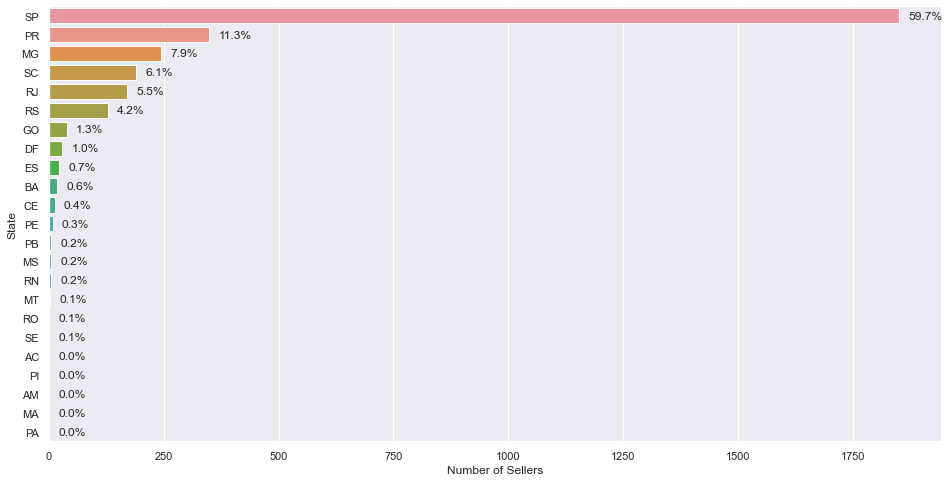

In [114]:
sellers_by_state = sellers[['seller_state','seller_id']]\
                    .groupby(by= 'seller_state')\
                    .count()\
                    .sort_values(by= 'seller_id', ascending= False)\
                    .reset_index()
sellers_by_state.rename(columns= {'seller_state': 'State', 
                                  "seller_id": 'Number of Sellers'}, 
                        inplace = True)
sellers_by_state['Percentage'] = sellers_by_state['Number of Sellers']/sum(sellers_by_state['Number of Sellers']) * 100
sellers_by_state['Percentage'] = sellers_by_state['Percentage'].map('{:,.1f}%'.format)

sns.set(rc={'figure.figsize':(16,8)})
plot = sns.barplot(x= 'Number of Sellers', y = 'State', data= sellers_by_state);

y = 0
for patch, percentage in zip(plot.patches, sellers_by_state['Percentage']):
    x = patch.get_width() + 20
    plot.annotate(percentage,(x,y), verticalalignment= 'center')
    y += 1

In [48]:
geo_by_city = geolocation.groupby('geolocation_city').agg({'geolocation_lat':'mean', 'geolocation_lng': 'mean'})

In [50]:
geo_by_city

,geolocation_lat,geolocation_lng
geolocation_city,,
* cidade,-25.571748,-49.334374
...arraial do cabo,-22.969370,-42.029834
4o. centenario,-24.271860,-53.069433
4º centenario,-24.279801,-53.074723
abadia de goias,-16.767063,-49.438089
...,...,...
áurea,-27.695009,-52.055076
ângulo,-23.195024,-51.917294
érico cardoso,-13.393047,-42.134282


In [49]:
sellers[['seller_id','seller_city']].groupby(by = 'seller_city').count().merge(geo_by_city, 
                                                                               how= 'left',
                                                                               left_on='seller_city', 
                                                                               right_on='geolocation_city')

KeyError: "None of ['seller_city'] are in the columns"

In [44]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
# initiate a blank map centered on mean lat long
map = folium.Map(location=[data['geolocation']['geolocation_lat'].mean(), 
                           data['geolocation']['geolocation_lng'].mean()], zoom_start=5, control_scale=True)

for i, row in data['geolocation'].iterrows():
    folium.Marker(
            location=[row.geolocation_lat, row.geolocation_lng],
            popup=row.geolocation_city,
            icon=folium.Icon(color="red", icon="info-sign"),
        ).add_to(map)
map